In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import  KNeighborsClassifier

In [3]:
df = pd.read_csv("data/titanic.csv", index_col='PassengerId')
df.drop(columns = ['Name',  'Ticket','Cabin'], inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


# Exploratory Data Analysis (EDA)

### Target

In [4]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Numeric vs Target

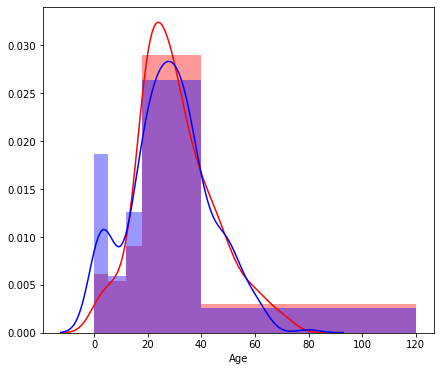

In [8]:
plt.figure(figsize=(7,6))
sns.distplot(df.Age[df.Survived ==0], bins = [0, 5, 12, 18, 40, 120], color = 'r', label = 'not survive')
sns.distplot(df.Age[df.Survived ==1], bins = [0, 5, 12, 18, 40, 120], color = 'b', label = 'survive')

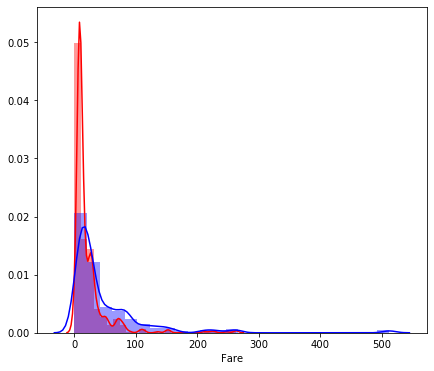

In [9]:
plt.figure(figsize=(7,6))
sns.distplot(df.Fare[df.Survived ==0], bins = 25, color = 'r', label = 'not survive')
sns.distplot(df.Fare[df.Survived ==1], bins = 25, color = 'b', label = 'survive')

### Categoric/Ordinal vs Target

Pclass AxesSubplot(0.125,0.536818;0.227941x0.343182)
Sex AxesSubplot(0.398529,0.536818;0.227941x0.343182)
SibSp AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Embarked AxesSubplot(0.125,0.125;0.227941x0.343182)


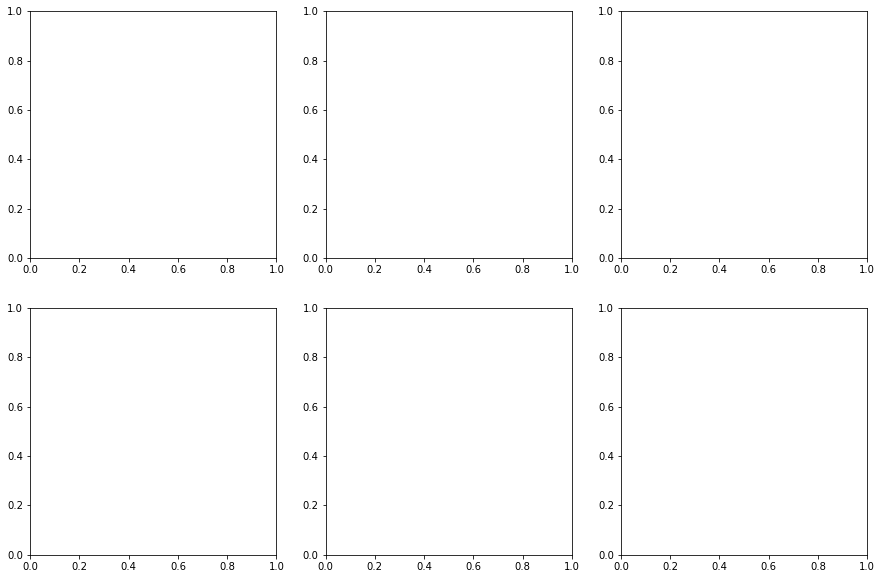

In [17]:
cat_var = ["Pclass", "Sex", "SibSp","Embarked"]

fig, axes = plt.subplots(2, 3, figsize = (15, 10) )

for cat, ax in zip(cat_var, axes.flatten()):
    print(cat, ax)

# Binning